# Analysis on USDJPY and Forecasting
### Application of the following concepts:
##### 1. Augmented Dickey Fuller Test to test for Random Walks
##### 2. ACF and PACF to find existence of autocorrelation
##### 3. AR and MA testing to see which are better models using AIC information criteria
##### 4. ARIMA model for forecasting

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

### Import the data

In [2]:
df_jpy = pd.read_csv('Data/DEXJPUS_19710104_20180504.csv', header=0, index_col='DATE')
df_sgd = pd.read_csv('Data/DEXSIUS_19810102_20180504.csv', header=0, index_col='DATE')

In [3]:
df_jpy.index = pd.to_datetime(df_jpy.index)
df_jpy = df_jpy.loc['2000-01-01':]
df_jpy.DEXJPUS = pd.to_numeric(df_jpy.DEXJPUS, errors='coerce')
df_jpy = df_jpy.fillna(method='ffill')
df_jpy_pct_chg = df_jpy.pct_change().dropna() #this is a pct change
df_jpy_chg = df_jpy.diff().dropna()


df_sgd = df_sgd.loc['2000-01-01':]
df_sgd.DEXSIUS = pd.to_numeric(df_sgd.DEXSIUS, errors='coerce')

In [4]:
print(df_jpy_chg.head())
print(df_jpy_pct_chg.head())

            DEXJPUS
DATE               
2000-01-04     1.39
2000-01-05     0.68
2000-01-06     1.42
2000-01-07    -0.02
2000-01-10     0.11
             DEXJPUS
DATE                
2000-01-04  0.013668
2000-01-05  0.006596
2000-01-06  0.013684
2000-01-07 -0.000190
2000-01-10  0.001046


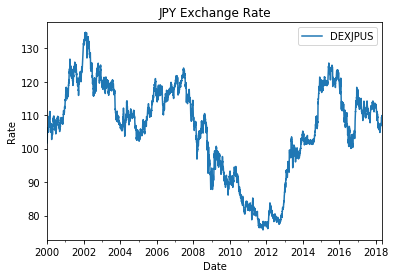

In [5]:
_ = df_jpy.plot(title='JPY Exchange Rate')
_ = plt.xlabel('Date')
_ = plt.ylabel('Rate')
plt.show()

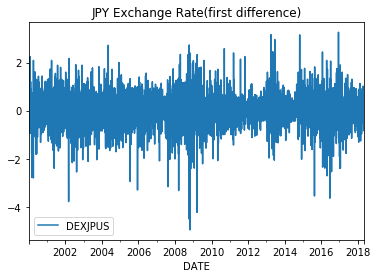

In [6]:
_ = df_jpy_chg.plot(title='JPY Exchange Rate(first difference)')

Augmented Dickey Fuller Test to test for random walks on Rate:

In [7]:
result_rate = adfuller(df_jpy['DEXJPUS'])
result_chg = adfuller(df_jpy_chg['DEXJPUS'])

In [8]:
print('The p-value of the ADF Test on Rate is: {0}'.format(result_rate[1]))
print('The p-value of the ADF Test on Change is: {0}'.format(result_chg[1]))

The p-value of the ADF Test on Rate is: 0.4348157690666751
The p-value of the ADF Test on Change is: 0.0


    Notes (from help(adfuller))
    ----------------------------
    The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
    root, with the alternative that there is no unit root. If the pvalue is
    above a critical size, then we cannot reject that there is a unit root.
    
    The p-values are obtained through regression surface approximation from
    MacKinnon 1994, but using the updated 2010 tables.
    If the p-value is close to significant, then the critical values should be
    used to judge whether to accept or reject the null.

- Null Hypothesis, H0: there is a unit root, indicating random walks
- Alternate Hypothesis: there is no unit root, indicating no random walks

Since the p-value for Rate is 0.43, which is bigger than 0.01/0.05 significant levels, we cannot reject the null hypothsis
The p-value for returns is 0, which is lower than 0.01/0.05 significance levels, we reject the null hypothesis. We can proceed next to apply the ARMA models on the returns.

### ACF and PACF

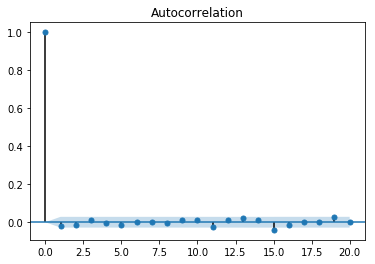

In [9]:
_ = plot_acf(df_jpy_chg['DEXJPUS'], lags=20)

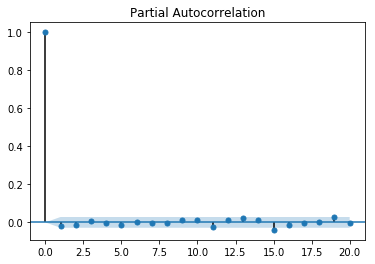

In [10]:
_ = plot_pacf(df_jpy_chg['DEXJPUS'], lags=20)

The autocorrelation (acf) graph shows no significant lags. This implies that we cannot say much about the future with info from the past. If there had been a positive autocorrelation, the series would imply momentem. If there had been a negative autocorrelation, the series would imply mean-reveresion.

The partial-autocorrelation (pacf) graph shows no lags as well.

### ARMA

Given that we found no significant lags in the acf() and pacf() functions above, ARMA is not appropriate here, since no lags are significant to be used to forecast the future. But we will try any way with AR(1), MA(1) and ARMA(1,1)

In [11]:
mod = ARMA(df_jpy_chg, order=(1,0)) #AR(1) Model
res = mod.fit()
print('The AIC for an AR(1) model on JPY is: {0}'.format(res.aic))

The AIC for an AR(1) model on JPY is: 9734.933780917472


In [12]:
mod = ARMA(df_jpy_chg, order=(0,1)) # MA(1) model
res = mod.fit()
print('The AIC for a MA(1) model on JPY is: {0}'.format(res.aic))

The AIC for a MA(1) model on JPY is: 9734.884929792572


In [13]:
mod = ARMA(df_jpy_chg, order=(1,1)) # ARMA(1,1) model
res  = mod.fit()
print('The AIC for an ARMA(1,1) model on JPY is: {0}'.format(res.aic))

The AIC for an ARMA(1,1) model on JPY is: 9736.396058632272


In general, the AIC for all 3 models look huge and similar. Models with smaller AIC values are better than Models with larger AIC values. In this case, the ARMA (1,1) model has a smaller AIC value, but only just by 1, which cannot say much about ARMA(1,1) being better. The AIC values for all 3 are large anyway. which indicates that all 3 models do not provide a good fit for JPY returns time series.

### ARIMA

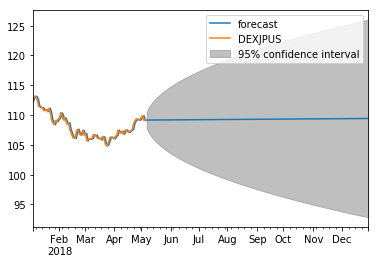

In [14]:
mod = ARIMA(df_jpy, order=(1, 1, 1))
res = mod.fit()

_ = res.plot_predict(start='2018-01-04', end='2018-12-31')

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.DEXJPUS   No. Observations:                 4784
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4864.198
Method:                       css-mle   S.D. of innovations              0.669
Date:                Fri, 18 May 2018   AIC                           9736.396
Time:                        14:12:00   BIC                           9762.288
Sample:                    01-04-2000   HQIC                          9745.491
                         - 05-04-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               0.0015      0.009      0.165      0.869        -0.017     0.020
ar.L1.D.DEXJPUS     0.3913      0.570      0.686      0.493        -0.727     1.509
ma.L1.D.DEXJPUS    -0.4113      0.565     -0.728      0.467        -1.519     0.696
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5557           +0.0000j            2.5557            0.0000
MA.1            2.4311           +0.0000j            2.4311            0.0000
-----------------------------------------------------------------------------
"""

In summary, the the ARIMA(1,1,1) model forecasts that the USDJPY rate will hover on average around 109 JPY per USD throughout into the year end, ceteris paribus.